# Introducción al algoritmo de la Transformada rápida de Fourier: FFT
## Ejercicio 0: introducción a la FFT

Vamos a usar como señal de ejemplo $x(t) = sen(\omega_{0}t)$. Repasar el Ejemplo 4.7 (pag. 326), para tener claro cuál es el resultado esperado de la Transformada de Fourier de esta señal. Es importante aclarar que este Ejemplo se hace la transformada en tiempo continuo. La fft es un algoritmo que implementa la transformada en tiempo discreto. Aún así, este ejemplo nos da una referencia del resultado que esperamos, como se muestra en la figura a continuacion.
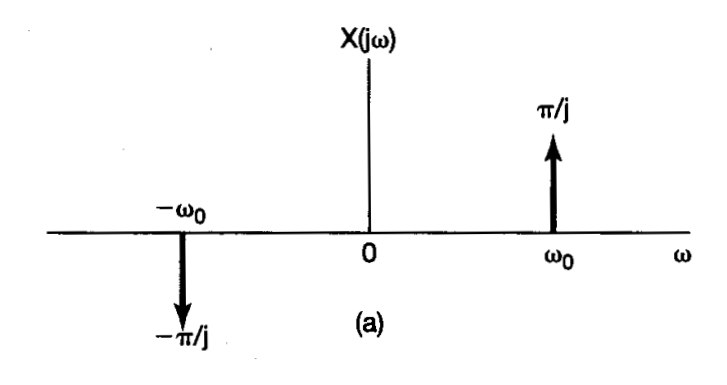
<br>
En la imagen se ven cuatro gráficas: las dos de la mitad superior corresponden a Transformada y Serie de Fourier en tiempo continuo, y las de abajo a la Transformada en tiempo discreto y resultado de aplicar la fft. Esto ayuda a entender el significado de esta última: observar que es como un muestreo de la Transformada de Fourier en tiempo discreto.

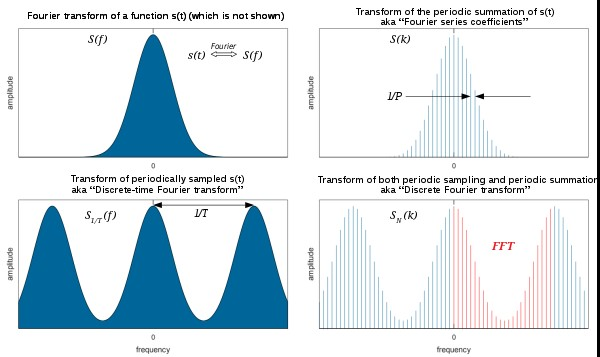

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [20]:
# Definicion de t y x(t)

h_t = 0.08 # paso del eje de tiempo
t = np.arange(0, 4, h_t)  # definicion del eje de tiempo

f = 2  # Frecuencia del seno
x = np.sin(2*np.pi*f*t)  # definicion de x(t)

**Consigna: revisar la documentación de la fft:** 
- Documentación general: https://numpy.org/doc/stable/reference/routines.fft.html
- Documentación np.fft.fft https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#
- Documentación np.fft.fftfreq: https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

<StemContainer object of 3 artists>

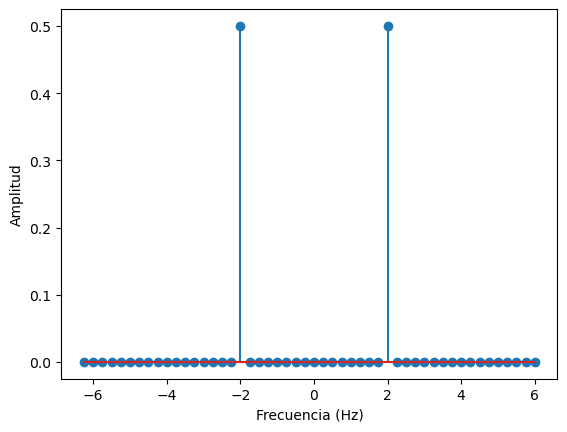

In [22]:
# Uso fftfreq para crear el eje de frecuencias
freq = np.fft.fftfreq(len(t), d = h_t)   # Construcción del eje de frecuencia

# Calculo de la transformada de x(t)
transf_x = np.fft.fft(x, norm = 'forward')

plt.figure()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.stem(freq, np.abs(transf_x))

**Consigna: con base en la documentacion, explicar por qué es necesario especificar el siguiente parametro en el cálculo de la fft: norm = 'forward'. Probar quitarlo y observar lo qué sucede.** <br>
Respuesta:

Tambien es posible construir el eje de frecuencia "a mano".

Text(0, 0.5, 'Amplitud')

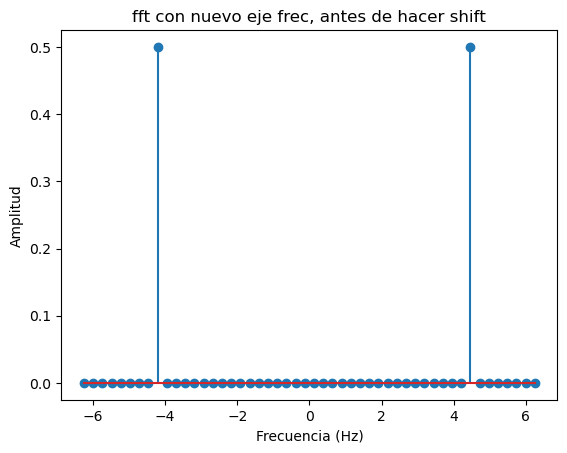

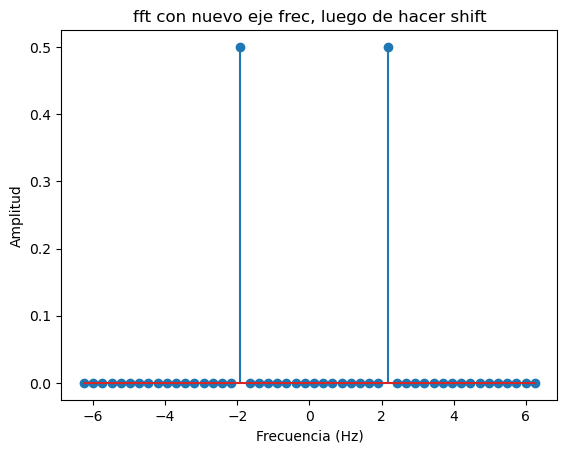

In [24]:
freq = np.linspace(-0.5, 0.5, len(transf_x))/h_t   # Esto arroja un vector [-fs/2:fs/2], siendo fs la frec de muestreo de t

plt.figure()
plt.stem(freq, np.abs(transf_x))
plt.title('fft con nuevo eje frec, antes de hacer shift')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

# Hago un shift a la transformada
transf_x = np.fft.fftshift(transf_x)

plt.figure()
plt.stem(freq, np.abs(transf_x))
plt.title('fft con nuevo eje frec, luego de hacer shift')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')


**Consigna: revisar la documentacion de fft.fftshift. ¿Qué efecto tiene aplicar un shift?.**
https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html <br>
Respuesta:

## Ejercicio 1: combinación lineal de senos
En este ejercicio se proporciona una señal temporal compuesta por una combinación lineal de senos. El objetivo es lograr averiguar la frecuencia y amplitud de cada una de estas componentes. A continuación se proporciona el eje de tiempo $t$ y el vector de datos de la señal $s$.

Text(0, 0.5, 'Amplitud')

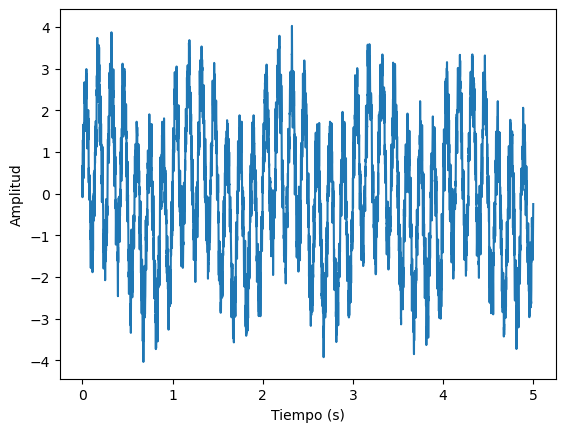

In [29]:
datos = np.genfromtxt('datos.csv', delimiter=',')
t = datos[1:, 1]  # eje de tiempo
s = datos[1:, 2]  # señal

plt.figure()
plt.plot(t, s)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

In [30]:
# Resolucion

## Ejercicio 2: señal de EOG
En este ejercicio se hará la FFT de una señal biológica. Se busca evaluar en qué rango de frecuencias se encuentras las componentes más relevantes.

Text(0, 0.5, 'Amplitud (V)')

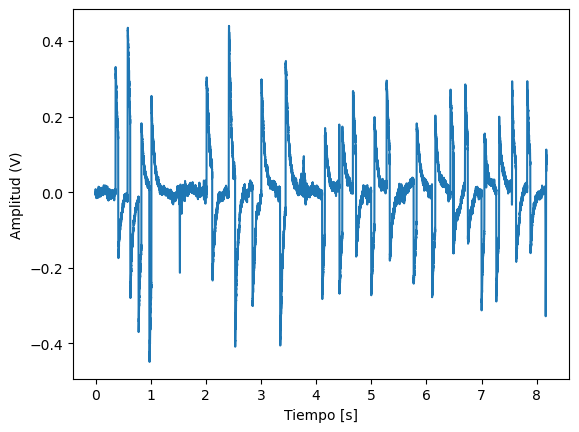

In [9]:
# Levantamos la señal de EOG y la graficamos en el tiempo
filename='Andres.csv'
t_list = []
sig_list = []
with open(filename, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    i=0
    for row in spamreader:
        if i>=9:
            if len(row[1])>0:
                t_list.append(float(row[0]))
                sig_list.append(float(row[1]))
        i=i+1
t=np.array(t_list)[:-1500]
sig=np.array(sig_list)[:-1500]
plt.figure()
plt.plot(t, sig)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (V)')

1) Calcule y grafique la FFT de la señal de EOG. El eje de tiempo es la variable $t$ y la señal es $sig$. Se recomienda seguir los siguientes pasos:
- Calcular la frecuencia de muestreo usando los datos del eje de tiempo (asumiendo que es constante).
- Calcular el eje de frecuencia con la función vista en el ejercicio anterior.
- Calcular la FFT de la señal. 

2) Discuta los resultados obtenidos. Busque en internet en qué rango de frecuencias se encuentra una señal de este estilo y compare.


In [ ]:
# Resolucion

**Opcional:**
Enventane la señal previamente a hacer la FFT y compare los resultados en frecuencia con lo hecho anteriormente.